

      
  # Project: Investigate No-Show Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> The dataset being explored in this project is collected from 100 thousand medical appointments in brazil, and focuses on the question whether patients show up for their appointments or not this data was collected from [kaggle](https://www.kaggle.com/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv). Information about patients such as their age, neighborhood, whether the patient is enrolled in Brasilian welfare program Bolsa Família, health conditions and whether they recieved sms or not are included in this dataset.

### Question(s) for Analysis
##### does gender play a role in patients not showing up for their appointments?
##### do patients enrolled in Brasilian welfare program show up more than the ones that are not?
##### which health condition has the highest no showup appointment rates?
##### how does multiple co-morbodities affect show up rate?
##### which neighbourhood had the highest no show up?
##### which age group has the highest no show up?
##### did receiving sms affect the show up rate?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>Checking the structure of the data as well as looking for null values or duplicated rows or any errors in the data that can be fixed


### General Properties

In [3]:
# Loading the data and checking the first 5 rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
df.describe()
#it seems like there's a patient with -1 age, the rest of the data is given in boolean expression 'Yes' 'No' or 1, 0.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>This doesn't work the first time rerunning the cells, however after rerunning it for the second time it works just fine. I believe it has to do with the upgrade in the cells above.

In [4]:
#checking the number of rows and columns for the dataset
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>There are 110527 rows and 14 columns of data

### Data Cleaning

#### checking for null values & Duplicate rows

In [6]:
# checking for null values in the data
df.info()
null_values = df.isnull().sum()
null_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#checking for duplicated rows
duplicated_rows = df.duplicated().sum()
duplicated_rows


0

>there was no null values or duplicated rows.

In [8]:
#dropping the row with -1 or 0 age in it
values =[0, -1]
df = df[df.Age.isin(values) == False]


In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace=True)

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Columns require more formatting in order to have the same format so its easier to recall the column.

In [12]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
#this function turns all uppercases into lower and replaces any '-' into '_'

In [13]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>health conditions such as hypertension and handicap are misspelled or written in portuguese, therefore renaming them with the function rename is necessary

In [14]:
df.rename(columns ={'hipertension': 'hypertension', 'handcap':'handicap'}, inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
# Exploratory Data Analysis

In [15]:
df.no_show.value_counts()

No     85307
Yes    21680
Name: no_show, dtype: int64

**no here means the patients showed up while yes means the patient did not show up**

In [16]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


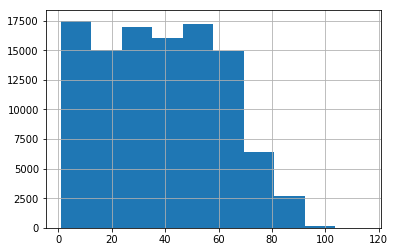

In [17]:
df['age'].hist();

>age groups are more skewed to the right in this dataset

###### Creating a new variable for patients who showed up and patients who did not 

In [18]:
show_up =df.no_show =='No'
no_show_up=df.no_show =='Yes'
show_up.sum() + no_show_up.sum() == df.shape[0]
#making sure the new variables include all data.


True

### Research Question 1 are more women not showing up to medical appointment than men? 

In [19]:
#creating variables for genders showing up
num_females_no_show_up = df[no_show_up].query('gender == "F"').shape[0]
num_females_show_up = df[show_up].query('gender == "F"').shape[0]
num_males_no_show_up = df[no_show_up].query('gender == "M"').shape[0]
num_males_show_up = df[show_up].query('gender == "M"')['gender'].shape[0]
#to make sure numbers add up;
num_females_no_show_up + num_females_show_up + num_males_no_show_up + num_males_show_up == df.shape[0]

True

In [20]:
#using proportion as the total number of males and females may very well differ in this dataset, therefore this is a more realistic comparison
percent_female_no_show_up = (num_females_no_show_up/df.query('gender == "F"')['gender'].count())*100
percent_male_no_show_up = (num_males_no_show_up/df.query('gender == "M"')['gender'].count())*100
(percent_female_no_show_up, percent_male_no_show_up)

(20.358538463732565, 20.084623938810385)

> as we can see the number of females not showing up to medical appointments is slightly more than males, however the percentage of females not showing up compared to males is very small this can be further seen in the plot below

Text(0,0.5,'Percentage of not showing up')

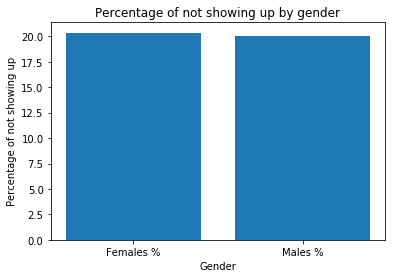

In [21]:
#creating a plot of precentage male vs females that did not show up
plt.bar(["Females %", "Males %"], [percent_female_no_show_up, percent_male_no_show_up])
plt.title("Percentage of not showing up by gender")
plt.xlabel('Gender')
plt.ylabel('Percentage of not showing up')

### Research Question 2  (do patients enrolled in Brasilian welfare program show up more than the ones that are not)

In [22]:
#creating variables for patients enrolled in the welfare program and ones that are not
enrolled_patients_show_up = df[show_up].query('scholarship == 1').shape[0]
non_enrolled_patients_show_up = df[show_up].query('scholarship == 0').shape[0]

In [23]:
#proportions of enrolled patients and non_enrolled
prop_enrolled_patients = enrolled_patients_show_up/ df.query('scholarship== 1').shape[0]
prop_non_enrolled = non_enrolled_patients_show_up/ df.query('scholarship == 0').shape[0]

Text(0,0.5,'showing up')

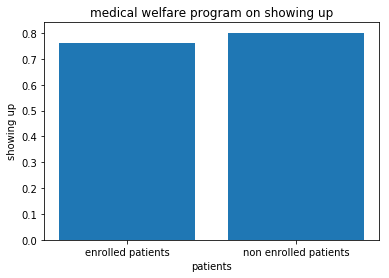

In [24]:
#creating a plot to compare between enrolled patients in medical welfare program and non enrolled in showing up.
plt.bar(["enrolled patients", "non enrolled patients"], [prop_enrolled_patients, prop_non_enrolled])
plt.title("medical welfare program on showing up")
plt.xlabel('patients')
plt.ylabel('showing up')

>patient not enrolled in the medical welfare program showed up more to their medical appointment

### Research Question 3  (how does multiple co-morbodities affect show up rate?)

In [25]:
#exploring the relation between co-morbodity and no_show
hypertensive_no_show = df[no_show_up].query('hypertension == 1').shape[0]
diabetic_no_show = df[no_show_up].query('diabetes == 1').shape[0]
alcoholism_no_show = df[no_show_up].query('alcoholism == 1').shape[0]
handicapped_no_show = df[no_show_up].query('handicap == 1').shape[0]
hypertensive_no_show, diabetic_no_show, alcoholism_no_show, handicapped_no_show

(3772, 1430, 677, 366)

Text(0,0.5,'no show')

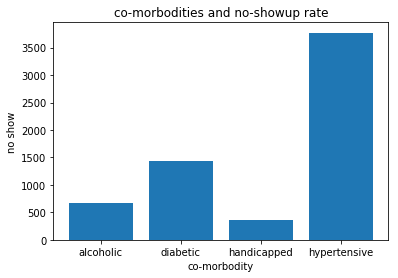

In [26]:
#plotting co-morbodities against number of no show appointments
plt.bar(["hypertensive","diabetic","alcoholic","handicapped"], [hypertensive_no_show, diabetic_no_show, alcoholism_no_show, handicapped_no_show])
plt.title('co-morbodities and no-showup rate')
plt.xlabel('co-morbodity')
plt.ylabel('no show')

> it is very clear that hypertensive patients had a far more exceeding rate of not showing up than other co-morbodities

### Research Question 4  (which co-morbodity did not show up more?)

Text(0,0.5,'number of patients')

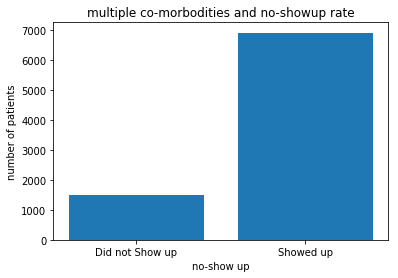

In [27]:
#creating two variables for no show and show up for multiple co-morbodities
multiple_co_morbodities_no = df[no_show_up].query('hypertension + diabetes + alcoholism + handicap >= 2').shape[0]
multiple_co_morbodities_show = df[show_up].query('hypertension + diabetes + alcoholism + handicap >= 2').shape[0]
plt.bar(["Showed up","Did not Show up"],[multiple_co_morbodities_show,multiple_co_morbodities_no])
plt.title('multiple co-morbodities and no-showup rate')
plt.xlabel('no-show up')
plt.ylabel('number of patients')


> seems like the exact opposite happened, more patients with multiple co-morbodities showed up to their appointments than not showing up.

### Research Question 5  (which neighbourhood is associated with the most no show up rate?)

In [28]:
neighbourhoods_no_show = df[no_show_up].neighbourhood.value_counts()

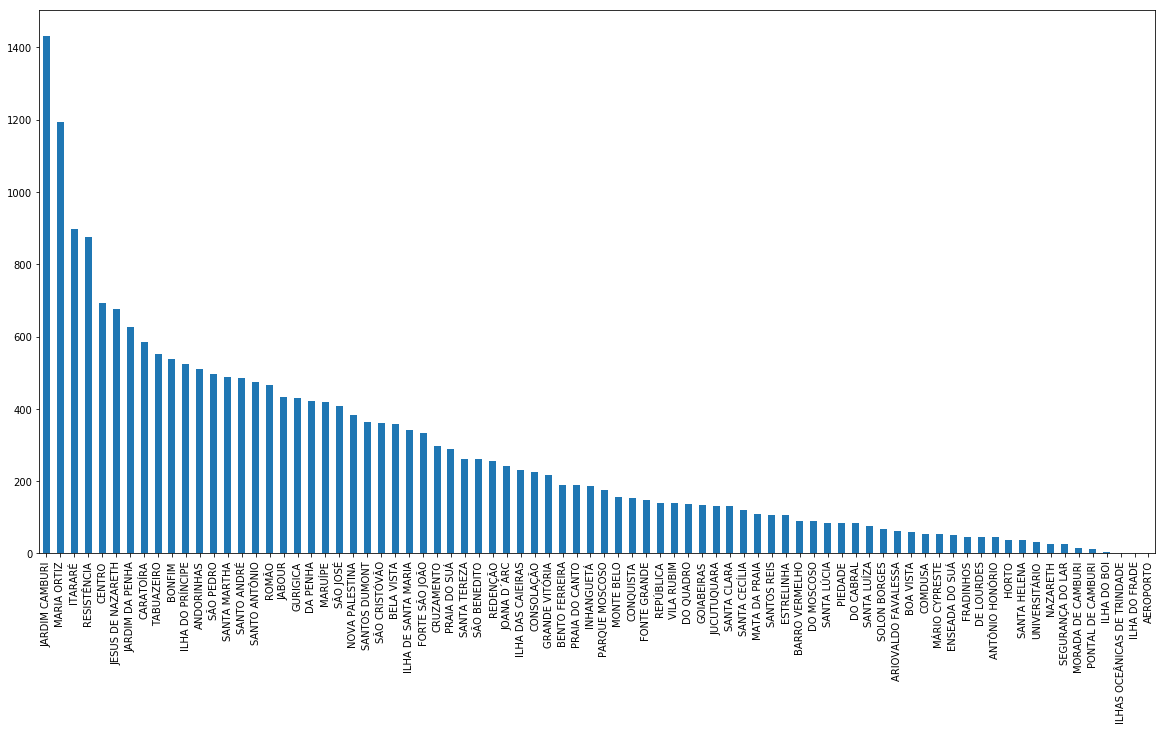

In [29]:
neighbourhoods_no_show.plot(kind= 'bar',figsize= (20,10));

##### looks like jardim camburi had the highest no-showup rate than other neighbourhoods.

### Research Question 5 (is there difference between age groups in not showing up?)

In [30]:
#creating new column for age groups
df['age'].describe() 

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

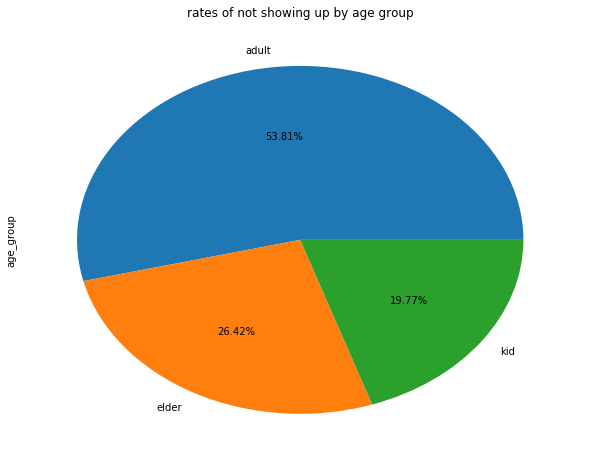

In [31]:
#creating age groups for patients and evaluating which age group had the highest no show up rate.
bin_edges= [0, 14, 50, 115]
bin_names = ['kid','adult','elder']
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df[no_show_up]['age_group'].value_counts().plot(kind='pie', title= 'rates of not showing up by age group', figsize=(10,8), autopct='%1.2f%%')

### Research Question 6 (did more patients receiving sms show up for their appointments?)

In [32]:
#creating variables for all cases of sms received or not
num_showup_received = df[show_up].query('sms_received == 1').shape[0]
num_showup_no_received= df[show_up].query('sms_received==0').shape[0]
num_no_showup_no_received = df[no_show_up].query('sms_received == 0').shape[0]
num_no_showup_received = df[no_show_up].query('sms_received == 1').shape[0]

Text(0,0.5,'number of patients')

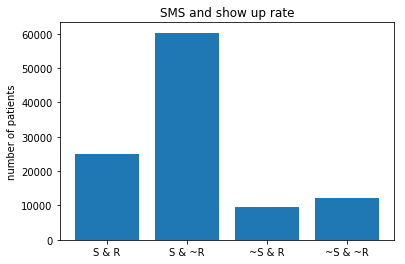

In [33]:
#plotting sms received and showing up.
plt.bar(["S & R","S & ~R","~S & ~R","~S & R"],[num_showup_received, num_showup_no_received, num_no_showup_no_received, num_no_showup_received])
plt.title('SMS and show up rate')
plt.ylabel('number of patients')

> S= showed up, R=received sms, ~S= didnt show up, ~R= didnt receive

<a id='conclusions'></a>
## Conclusions

> through analyzing this dataset, there seem to be more adults that do not show up to their medical appointments in this data than kids or elders, and patients suffering from hypertension seem to be the bigger population not showing up to their medical appointments in this data. Certain neighbourhoods have higher no show than other neighbourhoods such as jadim camburi in this data. Gender did not have an impactful role on no show appointments, and finally through analyzing patients with multiple co-morbodities it turns out they showed up more than they did not show up. 


